<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [129]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [130]:
# Load MNIST dataset
(X_train_all, y_train_all), (X_test, y_test) = keras.datasets.mnist.load_data()

total_samples = len(X_train_all)

train_samples = int(0.8 * total_samples)
test_samples = int(0.1 * total_samples)
val_samples = total_samples - train_samples - test_samples

# Split the data
X_train = X_train_all[:train_samples]
y_train = y_train_all[:train_samples]

X_val = X_train_all[train_samples:train_samples + val_samples]
y_val = y_train_all[train_samples:train_samples + val_samples]

X_test = X_train_all[train_samples + val_samples:]
y_test = y_train_all[train_samples + val_samples:]


In [131]:
len(X_train)

48000

In [132]:
len(X_test)

6000

In [133]:
len(X_val)

6000

In [134]:
X_train[0].shape

(28, 28)

In [135]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

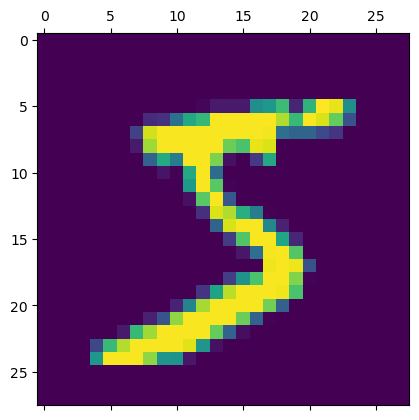

In [136]:
plt.matshow(X_train[0])

In [137]:
y_train[0]

5


Normalizing pixel values is a common preprocessing step in machine learning, especially for tasks involving image data. In the context of image processing, pixel values usually range from 0 to 255, where 0 represents black and 255 represents white. Normalizing the pixel values to a scale between 0 and 1 has several advantages:


In [138]:
X_train = X_train / 255
X_test = X_test / 255

In [139]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [140]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [141]:
X_train_flattened.shape

(48000, 784)

In [142]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [143]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 2s 943us/step - loss: 0.5000 - accuracy: 0.8688
Epoch 2/10
1500/1500 [==============================] - 1s 937us/step - loss: 0.3278 - accuracy: 0.9086
Epoch 3/10
1500/1500 [==============================] - 1s 910us/step - loss: 0.3064 - accuracy: 0.9145
Epoch 4/10
1500/1500 [==============================] - 1s 907us/step - loss: 0.2945 - accuracy: 0.9174
Epoch 5/10
1500/1500 [==============================] - 1s 932us/step - loss: 0.2877 - accuracy: 0.9199
Epoch 6/10
1500/1500 [==============================] - 1s 912us/step - loss: 0.2822 - accuracy: 0.9215
Epoch 7/10
1500/1500 [==============================] - 1s 925us/step - loss: 0.2783 - accuracy: 0.9232
Epoch 8/10
1500/1500 [==============================] - 1s 887us/step - loss: 0.2755 - accuracy: 0.9238
Epoch 9/10
1500/1500 [==============================] - 1s 889us/step - loss: 0.2730 - accuracy: 0.9247
Epoch 10/10
1500/1500 [==============================] - 1s 909u

In [144]:
model.evaluate(X_test_flattened, y_test)

188/188 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9363


[0.2323499619960785, 0.9363333582878113]

In [145]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

188/188 [==============================] - 0s 764us/step


array([6.0757538e-11, 8.5969270e-16, 3.7570747e-08, 2.8880814e-08,
       7.9800113e-09, 4.6743644e-06, 4.2210790e-10, 9.1959907e-14,
       4.5367744e-07, 6.4199723e-10], dtype=float32)

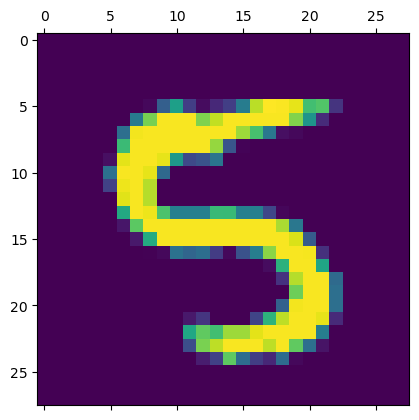

In [146]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [147]:
np.argmax(y_predicted[0])

5

In [148]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [149]:
y_predicted_labels[:5]

[5, 3, 0, 0, 0]

In [150]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[569,   0,   3,   1,   2,   6,   2,   3,   1,   0],
       [  0, 617,   2,   2,   0,   2,   0,   1,   6,   0],
       [  4,   2, 565,   5,   5,   3,   2,   5,   9,   0],
       [  3,   1,  14, 574,   1,  20,   1,   1,   8,   4],
       [  1,   9,   2,   0, 572,   0,   3,   2,   2,   4],
       [  7,   1,  12,  19,   5, 483,  10,   1,   7,   4],
       [  2,   2,   7,   0,   4,   2, 553,   0,   1,   0],
       [  1,   2,   6,   2,   6,   0,   0, 645,   1,   5],
       [  2,  19,   9,  11,   1,  21,   1,   7, 515,  11],
       [  1,   3,   3,   8,  12,   5,   0,  14,   5, 525]])>

Text(95.72222222222221, 0.5, 'Truth')

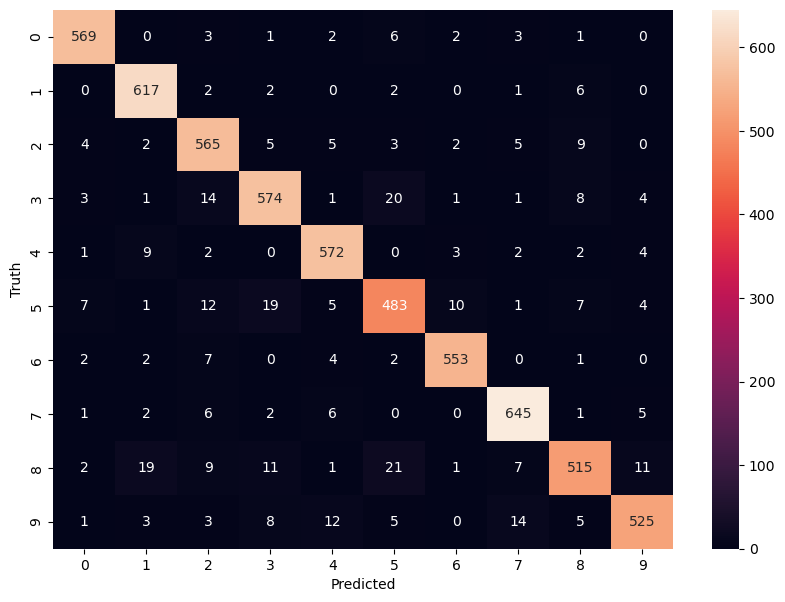

In [151]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [152]:
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,), activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(25,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.9133
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1204 - accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0867 - accuracy: 0.9742
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0648 - accuracy: 0.9799
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0509 - accuracy: 0.9850
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.017

In [153]:
model.evaluate(X_test_flattened,y_test)

188/188 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9797


[0.09163902699947357, 0.9796666502952576]

188/188 [==============================] - 0s 997us/step
tf.Tensor(
[[576   0   3   1   0   0   3   1   1   2]
 [  0 623   2   0   0   0   2   1   1   1]
 [  1   1 587   2   1   0   1   5   2   0]
 [  0   0   3 611   0   4   0   0   7   2]
 [  0   8   0   0 580   0   0   1   0   6]
 [  0   0   1   4   0 533   7   2   1   1]
 [  0   0   0   1   2   2 566   0   0   0]
 [  0   3   0   0   1   0   0 660   1   3]
 [  1   2   2   3   3   1   0   1 581   3]
 [  0   1   0   2   4   3   0   5   0 561]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

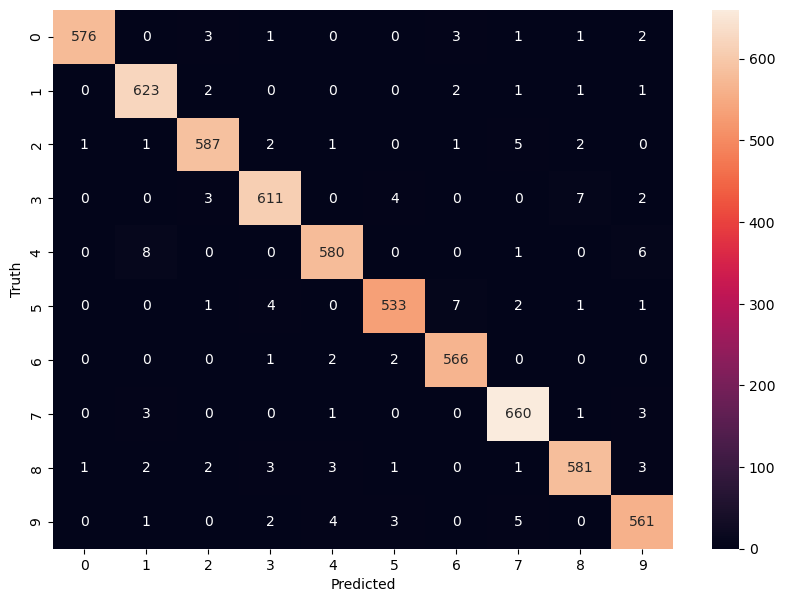

In [154]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [155]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.9164
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1215 - accuracy: 0.9644
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0846 - accuracy: 0.9747
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0652 - accuracy: 0.9806
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9881
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0331 - accuracy: 0.9906
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9926
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.016

In [156]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9813


[0.08806928247213364, 0.981333315372467]

Connvolutional layer Added as the first layer of the ANN
which improved accuracy 


In [157]:
from tensorflow import keras

# Assuming X_train has shape (num_samples, 28, 28) for grayscale images
# If you have color images, the input shape should be (28, 28, 3) assuming RGB
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)

model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming X_train has shape (num_samples, 28, 28, 1) for grayscale images
# If you have color images, the input shape should be (num_samples, 28, 28, 3) assuming RGB
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2116 - accuracy: 0.9326
Epoch 2/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 7/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0092 - accuracy: 0.9975
Epoch 8/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 9/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0039 - accuracy: 0.9988
Epoch 10/10
1500/1500 [==============================] - 19s 12m

In [158]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9888


[0.061248358339071274, 0.9888333082199097]

In [159]:
model.evaluate(X_val,y_val)

188/188 [==============================] - 1s 2ms/step - loss: 60.2223 - accuracy: 0.9597


[60.222259521484375, 0.9596666693687439]